# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [6]:
# Import libraries and packages.
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.
data.head(5)


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

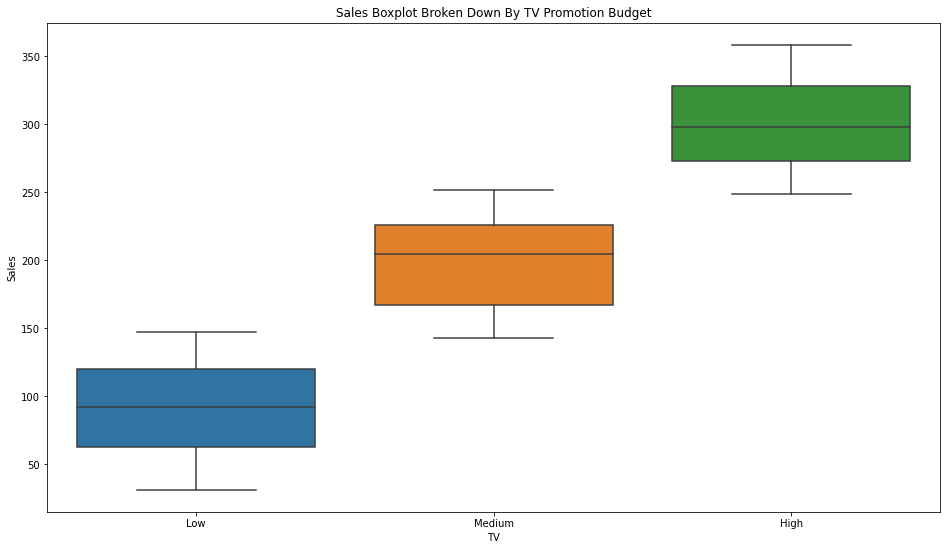

In [7]:
# Create a boxplot with TV and Sales.
plt.figure(figsize=(16,9))
sns.boxplot(data=data, x='TV', y='Sales')
plt.title("Sales Boxplot Broken Down By TV Promotion Budget")
plt.show()

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

There is large variance between sales and the tv promotion budget. As the buget increases the number of sales also increases, showing a positive correlation/relationship.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

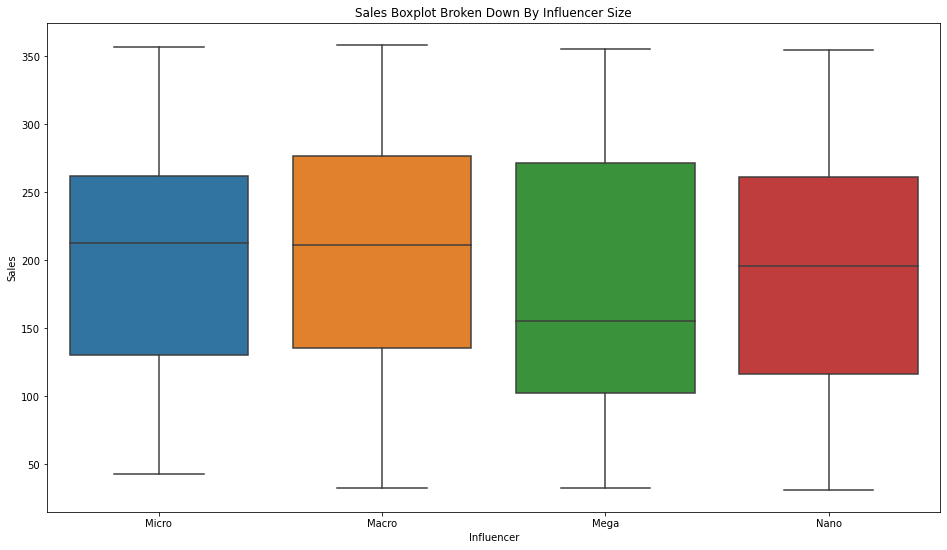

In [8]:
# Create a boxplot with Influencer and Sales.
plt.figure(figsize=(16,9))
sns.boxplot(data=data, x='Influencer', y='Sales')
plt.title("Sales Boxplot Broken Down By Influencer Size")
plt.show()

**Question:** Is there variation in `Sales` based off the `Influencer` size?

There is very little variation between sales and the influencer size.

### Remove missing data

In [9]:
# Drop rows that contain missing data and update the DataFrame.
data.dropna(axis=0, inplace=True)

# Confirm the data contains no missing values.
data.isna().any().sum()

0

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [10]:
# Create model
model = ols(formula='Sales~ C(TV)', data=data).fit()

# Display the model results.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          8.81e-256
Time:                        21:44:41   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** Which categorical variable did you choose for the model? Why?

I chose to use TV because of the variance seen in the boxplot above in this notebook. The TV variable explains approximately 87% of the variation within the sales numbers.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

Yes, since the TV variable is able to accurately capture the variation with the sales numbers and the boxplot shows a strong positive correlation the linearity assummption is met.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

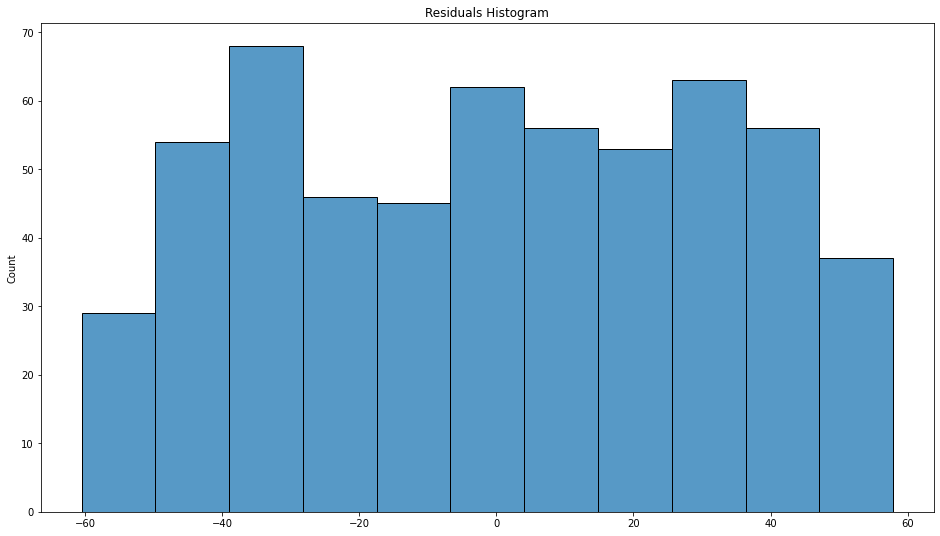

In [14]:
# Calculate the residuals.
resids = model.resid

# Create a histogram with the residuals. 
plt.figure(figsize=(16,9))
sns.histplot(resids)
plt.title('Residuals Histogram')
plt.show()


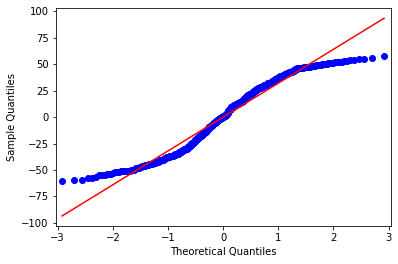

In [23]:
# Create a QQ plot of the residuals.
sm.qqplot(resids, line='s')
plt.show()

**Question:** Is the normality assumption met?

No, the normality assumption is not met.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

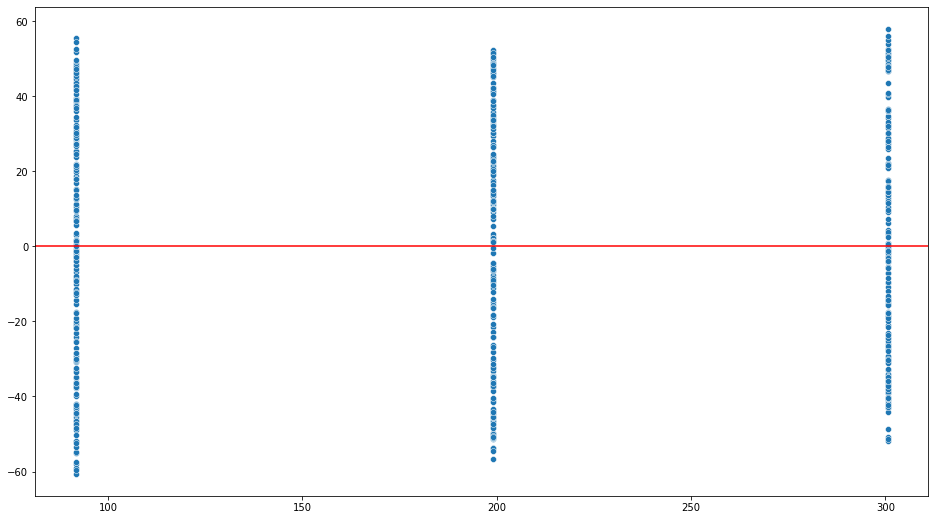

In [25]:
# Create a scatter plot with the fitted values from the model and the residuals.
plt.figure(figsize=(16,9))
sns.scatterplot(x=model.fittedvalues, y=resids)

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
plt.axhline(0, color='r')
plt.show()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

Yes

## **Step 4: Results and evaluation** 

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [26]:
# Create an one-way ANOVA table for the fit model.
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

H0: There is no difference between the mean sales numbers based on the TV budget.

Ha: There is a difference between the mean sales numbers based on the TV budget.

**Question:** What is your conclusion from the one-way ANOVA test?

We reject the null hypothesis and accept the alternative hypothesis. There is a difference between the mean sales numbers based on the the TV budget.

**Question:** What did the ANOVA test tell you?

The anova test tells us the relationhip between the means of the sales numbers based on the different TV budget groups. The means for the sales numbers are not all equal among the three TV budget groups.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [27]:
# Perform the Tukey's HSD post hoc test.
tukey_oneway = pairwise_tukeyhsd(endog = data['Sales'], groups = data['TV'], alpha = 0.05)

In [28]:
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


**Question:** What is your interpretation of the Tukey HSD test?

The HSD tells us whether the means of sales numbers of the TV budget groups are the same. In this case they are all different, so we reject the null hypothesis.

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.